<a href="https://colab.research.google.com/github/hyj378/DeepLearning-Basic/blob/master/Labs_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow의 수행과정(session의 작동원리)

In [0]:
import tensorflow as tf


In [0]:
g1=tf.Graph()
with g1.as_default() as graph:
  const1=tf.constant(3)
  
sess=tf.Session() #default graph에대한 session을 열었다
sess.run(const1)  #default session이므로 const1이라는 상수변수(?)가 존재하지 않는다

RuntimeError: ignored

The Session graph is empty.  Add operations to the graph before calling run(). 오류가 발생했다.

const1변수는 g1안에있는 상수변수(?)이고,
session은 defalut graph에 대한 session이니 당연한 결과이다

(g1에 대한 session을 열고싶다면 
```
세션이름=tf.Session(graph=g1)
세션이름.run(실행할 가지)

```
)

In [0]:
a=tf.constant(1)
b=tf.constant(2)
c=tf.add(a,b)
sess=tf.Session() #default graph에 대해 세션 열고
sess.run(c) #연산이 시작하는 브랜치(가지)를 sess.run(fetches)로 

sess.run(가지)를 주면 가지를 따라서 연산을 시작하게 된다.

그래프 전체를 실행할 필요없이 그래프의 일부분(fetches)만 넘겨서 실행할 수 있다.

# Variable과 constant, Placeholder

In [0]:
g2=tf.Graph()
with g2.as_default():
  c1=tf.constant(1,name="c1")
  v1=tf.Variable(initial_value=1, name="v1")
  p=tf.placeholder("int32", [1], name="p")

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
type(c1)

tensorflow.python.framework.ops.Tensor

In [0]:
c1 #c1는 현재 그냥 텐서일 뿐(세션이 실행되지 않았으므로)

<tf.Tensor 'c1:0' shape=() dtype=int32>

In [0]:
c1.op #텐서에 해당하는 연산

<tf.Operation 'c1' type=Const>

In [0]:
c1.op.node_def #노드의 정의

name: "c1"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_INT32
      tensor_shape {
      }
      int_val: 1
    }
  }
}

name: "c1"<br>
op: "Const" #상수의 연산을 함<br>
attr {  #데이터타입에 관한 속성<br>
  key: "dtype" <br>
  value {#데이터타입은 int32임 <br>
    type: DT_INT32 <br>
  } <br> 
} <br> 
attr {  #값에 관한 속성<br> 
  key: "value" <br>
  value {<br>
    tensor {  #값은 int_val:1인 텐서임<br>
      dtype: DT_INT32<br>
      tensor_shape {<br>
      }<br>
      int_val: 1<br>
    }<br>
  }<br>
}<br>

In [0]:
type(v1)

tensorflow.python.ops.variables.RefVariable

In [0]:
v1 #v1는 현재 그냥 텐서일 뿐(세션이 실행되지 않았으므로)

<tf.Variable 'v1:0' shape=() dtype=int32_ref>

In [0]:
v1.op

<tf.Operation 'v1' type=VariableV2>

In [0]:
v1.op.node_def

name: "v1"
op: "VariableV2"
attr {
  key: "container"
  value {
    s: ""
  }
}
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "shape"
  value {
    shape {
    }
  }
}
attr {
  key: "shared_name"
  value {
    s: ""
  }
}

name: "v1"    <br>
op: "VariableV2"   #변수의 연산을 함 <br>
attr {    #container에 관한 속성(?)<br>
  key: "container"    <br>
  value {    <br>
    s: ""    <br>
  }    <br>
}    <br>
attr {    #데이터 타입에 관한 속성<br>
  key: "dtype"    <br>
  value {    <br>
    type: DT_INT32   #데이터 타입은 int32임 <br>
  }    <br>
}    <br>
attr {    #형에 관한 속성<br>
  key: "shape"    <br>
  value {    <br>
    shape {    <br>
    }    <br>
  }    <br>
}    <br>
attr {    #shared_name에 관한 속성<br>
  key: "shared_name"    <br>
  value {    <br>
    s: ""    <br>
  }    <br>
}    <br>

#### 아직 채워진 정보가 부족하다 session run 이후를 보자

In [0]:
v1._variable

<tf.Tensor 'v1:0' shape=() dtype=int32_ref>

이게 뭐지?<br>
위에서 확인할 수 있든 v1에 할당된 연산은 Variable2이다. 그리고 Variable클래스는 _variable텐서를 속성으로 가지고 있다. 이  _variable의 속성은 아래와 같다.

In [0]:
v1._variable.op.node_def

name: "v1"
op: "VariableV2"
attr {
  key: "container"
  value {
    s: ""
  }
}
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "shape"
  value {
    shape {
    }
  }
}
attr {
  key: "shared_name"
  value {
    s: ""
  }
}

다를것이 없어보인다..

In [0]:
type(p)

tensorflow.python.framework.ops.Tensor

In [0]:
p

<tf.Tensor 'p:0' shape=(1,) dtype=int32>

In [0]:
p.op

<tf.Operation 'p' type=Placeholder>

In [0]:
p.op.node_def

name: "p"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: 1
      }
    }
  }
}

placeholder의 연산을 하는 p노드는<br>
데이터 타입 속성으로 int32를<br>
형 속성으로는 1차원이라는 형태를 갖는다<br>

### 이제 그래프 g2의 세션을 만들어 실행시켜보자

In [0]:
g2.as_graph_def()

node {
  name: "c1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "v1/initial_value"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "v1"
  op: "VariableV2"
  attr {
    key: "container"
    value {
      s: ""
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
  attr {
    key: "shared_name"
    value {
      s: ""
    }
  }
}
node {
  name: "v1/Assign"
  op: "Assign"
  input: "v1"
  input: "v1/initial_value"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "_cla

In [0]:
with tf.Session(graph=g2) as sess:
  print("c1: ",sess.run(c1))
  sess.run(tf.global_variables_initializer())#모든 variable변수를 초기화함
  print("v1: ",sess.run(v1))
  print("p: ",sess.run(p, feed_dict={p:[100]}))#place holder변수는 세션실행시
                                         #feed_dict를 통해 값을 줘야함
  print("v1의 정의",v1.op.node_def)
  print("함수 정의",g2.as_graph_def())

c1:  1
v1:  1
p:  [100]
v1의 정의 name: "v1"
op: "VariableV2"
attr {
  key: "container"
  value {
    s: ""
  }
}
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "shape"
  value {
    shape {
    }
  }
}
attr {
  key: "shared_name"
  value {
    s: ""
  }
}

함수 정의 node {
  name: "c1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "v1/initial_value"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "v1"
  op: "VariableV2"
  attr {
    key: "container"
    value {
      s: ""
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "shape"

v1의 정의는 세션실행중과 아닐때 다른점이 없다.
각 노드의 정의는 달라지지 않나보다.

그래프에 세션실행 전, 후로 아래가 추가되었다.

node {<br>
name: "init"<br>
op: "NoOp" <br>
input: "^v1/Assign" <br>
}<br>
node {<br>
name: "init_1"<br>
op: "NoOp"<br>
input: "^v1/Assign"<br>
}<br>
node { <br>
name: "init_2" <br>
op: "NoOp"<br>
input: "^v1/Assign" <br>
}<br>
node {<br>
name: "init_3"<br>
op: "NoOp"<br>
input: "^v1/Assign"<br>
}<br> 
node {<br>
name: "init_4" <br>
op: "NoOp" <br>
input: "^v1/Assign" <br>
} 


또한<br>
node { name: "c1" op: "Const" attr { key: "dtype" value { type: DT_INT32 } } attr { key: "value" value { tensor { dtype: DT_INT32 tensor_shape { } int_val: 1 } } } }


node { name: "v1/initial_value" op: "Const" attr { key: "dtype" value { type: DT_INT32 } } attr { key: "value" value { tensor { dtype: DT_INT32 tensor_shape { } int_val: 1 } } } } 


node { name: "v1" op: "VariableV2" attr { key: "container" value { s: "" } } attr { key: "dtype" value { type: DT_INT32 } } attr { key: "shape" value { shape { } } } attr { key: "shared_name" value { s: "" } } } 


node { name: "v1/Assign" op: "Assign" input: "v1" input: "v1/initial_value" attr { key: "T" value { type: DT_INT32 } } attr { key: "_class" value { list { s: "loc:@v1" } } } attr { key: "use_locking" value { b: true } } attr { key: "validate_shape" value { b: true } } }


 node { name: "v1/read" op: "Identity" input: "v1" attr { key: "T" value { type: DT_INT32 } } attr { key: "_class" value { list { s: "loc:@v1" } } } } 
 
 
node { name: "p" op: "Placeholder" attr { key: "dtype" value { type: DT_INT32 } } attr { key: "shape" value { shape { dim { size: 1 } } } } } versions { producer: 27 }

는 공통이다.

# 플레이스 홀더 예제

In [0]:
#플레이스홀더 예제1
input = [1, 2, 3, 4, 5]
x = tf.placeholder(dtype=tf.float32)
y = x + 5

sess = tf.Session()
result = sess.run(y,feed_dict={x :input})

print(result)


[ 6.  7.  8.  9. 10.]


In [0]:
y.op

<tf.Operation 'add' type=Add>

In [0]:
y.op.node_def

name: "add"
op: "Add"
input: "Placeholder"
input: "add/y"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}

In [0]:
#플레이스홀더 예제2
mathScore = [85, 99, 84, 97, 92]
englishScore = [59, 80, 84, 68, 77]

a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
y = (a+b)/2

sess = tf.Session()
result = sess.run(y, feed_dict={a: mathScore, b: englishScore})

print(result)

[72.  89.5 84.  82.5 84.5]


In [0]:
y.op #진짜정확한 나눗셈..?

<tf.Operation 'truediv' type=RealDiv>

In [0]:
y.op.node_def

name: "truediv"
op: "RealDiv"
input: "add_1"
input: "truediv/y"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}

# 주요함수

In [0]:
a = tf.constant(17)
b = tf.constant(5)

sess = tf.Session()
c=tf.add(a, b)
v_add=sess.run(c)

c=tf.subtract(a, b)
v_sub=sess.run(c)

c=tf.multiply(a, b)
v_mult=sess.run(c)

c=tf.truediv(a,b)
v_trud=sess.run(c)

c=tf.mod(a,b)
v_mod=sess.run(c)

c=-a
v_=sess.run(c)

print(v_add,",",v_sub,",",v_mult,",",v_trud,",",v_mod,",",v_)

22 , 12 , 85 , 3.4 , 2 , -17


In [0]:
a=tf.constant(17.5)
b=tf.constant(5.0)

c=tf.negative(a) #음수를 반환
v1=sess.run(c)

c=tf.sign(a) #부호를 반환
v2=sess.run(c)

c=tf.square(a) #제곱을 반환
v3=sess.run(c)

c=tf.sqrt(a) #제곱근은 반환
v4=sess.run(c)

c=tf.pow(b,3) #거듭제곱을 수행
v5=sess.run(c)

print(v1,",", v2,",", v3,",", v4,",", v5)

-17.5 , 1.0 , 306.25 , 4.1833 , 125.0


In [0]:
c=tf.maximum(a, b) #더 큰값을 반환
v1=sess.run(c)

c=tf.minimum(a, b) #더 작은값을 반환
v2=sess.run(c)

c=tf.exp(b) #지수값을 계산 e^b
v3=sess.run(c)

c=tf.log(b) #로그값을 계산 ln b
v4=sess.run(c)

c=tf.sin(b)
v5=sess.run(c)

c=tf.cos(b)
v6=sess.run(c)

print(v1,",", v2,",", v3,",", v4,",", v5,",",v6)

17.5 , 5.0 , 148.41316 , 1.609438 , -0.9589243 , 0.2836622


[텐서플로우 아키텍쳐](https://gdyoon.tistory.com/3)<br>
텐서플로우는 파이썬 레벨에서는 연산을 수행하지 않는다.
텐서플로우 라이브러리를 통해 파이썬 (또는 다른 언어) 으로 그래프를 작성하고,

세션이 생성되면 연산장치(CPU, GPU)에 의하여 연산을 할당시키고,

펌웨어 레벨에서 고속연산을 수행합니다. 실제로 C에서 연산을 처리하여 속도가 빠릅니다.



# Linear Regression

In [0]:
#두 변수 W와 b를 렌덤으로 초기화후 출력하기
tf.set_random_seed(777)

W=tf.Variable([3], name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")

init_op=tf.global_variables_initializer()
sess=tf.Session()

sess.run(init_op)

W_final, b_final=sess.run([W, b])
print(W_final, b_final)

[3] [-1.0980189]


In [0]:
#cost 함수를 최소화하는 과정을 통해 적절한 W와 b값을 찾고 출력하기
tf.set_random_seed(777)
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W=tf.Variable(tf.random_normal([1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")

#hypothesis=tf.multiply(x_train, W) + b
hypothesis = x_train * W + b
# tf.add()

cost = tf.reduce_mean(tf.square(hypothesis-y_train))

#cost함수를 gradientDescent방식으로 minimize시켜라
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10001):
  _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
  
  if step % 1000 == 0:
    print(step, " : \ncost :",cost_val,"W and b: [", W_val,", ",b_val,"]")

0  : 
cost : 0.43659568 W and b: [ [0.29403773] ,  [1.7262623] ]
1000  : 
cost : 0.0034081403 W and b: [ [0.9323591] ,  [0.15376368] ]
2000  : 
cost : 2.7667274e-05 W and b: [ [0.99390554] ,  [0.01385413] ]
3000  : 
cost : 2.2479189e-07 W and b: [ [0.9994506] ,  [0.00124871] ]
4000  : 
cost : 1.8595566e-09 W and b: [ [0.9999499] ,  [0.00011358] ]
5000  : 
cost : 1.8587798e-11 W and b: [ [0.9999948] ,  [1.1350103e-05] ]
6000  : 
cost : 3.2448118e-12 W and b: [ [0.99999774] ,  [4.4899666e-06] ]
7000  : 
cost : 3.0695446e-12 W and b: [ [0.99999785] ,  [4.35086e-06] ]
8000  : 
cost : 3.0695446e-12 W and b: [ [0.99999785] ,  [4.35086e-06] ]
9000  : 
cost : 3.0695446e-12 W and b: [ [0.99999785] ,  [4.35086e-06] ]
10000  : 
cost : 3.0695446e-12 W and b: [ [0.99999785] ,  [4.35086e-06] ]


W는 1에, b는 0에 가까워지고 있음

In [0]:
#그래프 그리기 위해
import matplotlib.pyplot as plt

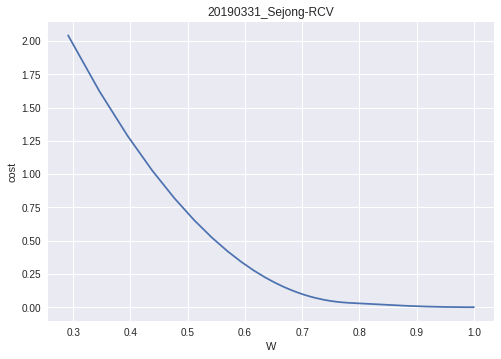

In [0]:
#cost 함수를 최소화하는 과정을 통해 적절한 W와 b값을 찾고 출력하기
tf.set_random_seed(777)
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W=tf.Variable(tf.random_normal([1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")

#hypothesis=tf.multiply(x_train, W) + b
hypothesis = x_train * W + b
# tf.add()

cost = tf.reduce_mean(tf.square(hypothesis-y_train))

#cost함수를 gradientDescent방식으로 minimize시켜라
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

W_history = []
cost_history = []

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10001):
  _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
  
  W_history.append(W_val)
  cost_history.append(cost_val)
  
plt.title('20190331_Sejong-RCV') 
plt.ylabel('cost')
plt.xlabel('W')
plt.plot(W_history, cost_history)
plt.show()

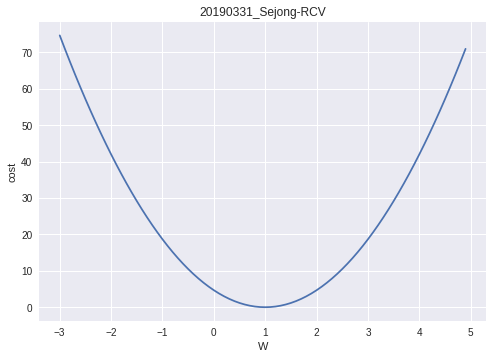

In [0]:
X=[1,2,3]
Y=[1,2,3]

W=tf.placeholder(tf.float32)
hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis-Y))

W_history=[]
cost_history=[]
for i in range(-30, 50):
  curr_W=i*0.1
  curr_cost=sess.run(cost, feed_dict={W:curr_W})
  
  W_history.append(curr_W)
  cost_history.append(curr_cost)
  
plt.title('20190331_Sejong-RCV') 
plt.ylabel('cost')
plt.xlabel('W')
plt.plot(W_history, cost_history)
plt.show()

In [0]:
#입력 3개
tf.set_random_seed(777)

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

w1=tf.Variable(tf.random_normal([1]), name='weight1')
w2=tf.Variable(tf.random_normal([1]), name='weight2')
w3=tf.Variable(tf.random_normal([1]), name='weight3')
b=tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

cost = tf.reduce_mean(tf.square(hypothesis - Y)) #reduce_mean은 평균함수

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10001):
  cost_val, hy_val, _= sess.run([cost, hypothesis, train],
                              feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
  if step % 2000 == 0:
    print(step, " cost: ", cost_val, "\n Prediction:\n", hy_val)

0  cost:  60810.07 
 Prediction:
 [-69.92225 -76.55041 -79.42077 -86.48076 -56.23655]
2000  cost:  1.2782195 
 Prediction:
 [149.98302 185.67307 180.03847 195.93097 143.36514]
4000  cost:  0.52545875 
 Prediction:
 [150.62762 185.23201 180.23701 196.06631 142.7934 ]
6000  cost:  0.27037075 
 Prediction:
 [151.00398 184.9748  180.35332 196.1425  142.46263]
8000  cost:  0.18367833 
 Prediction:
 [151.22426 184.82457 180.42175 196.18445 142.27193]
10000  cost:  0.1539849 
 Prediction:
 [151.3537  184.73657 180.4623  196.20654 142.16263]


[나중에 읽어보기](https://datascienceschool.net/view-notebook/17608f897087478bbeac096438c716f6/)

In [0]:
import numpy as np
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

x_data=np.array([])
x_data=np.stack([x1_data, x2_data, x3_data]) #그냥 쌓기
x_data = x_data.T
#위 2줄은 옆과 x = np.dstack([x1_data, x2_data, x3_data])

y_data=np.array(y_data)
y_data = y_data.reshape(5,-1)

print(x)
print(y)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]]
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]]


In [0]:
#입력 3개
tf.set_random_seed(777)

X=tf.placeholder(tf.float32, shape=[None, 3])
Y=tf.placeholder(tf.float32, shape=[None, 1])

W=tf.Variable(tf.random_normal([3, 1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y)) #reduce_mean은 평균함수

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10001):
  cost_val, hy_val, _= sess.run([cost, hypothesis, train],
                              feed_dict={X: x_data, Y: y_data})
  if step % 2000 == 0:
    print(step, " cost: ", cost_val, "\n Prediction:\n", hy_val)

0  cost:  66236.66 
 Prediction:
 [[-82.625336]
 [-85.824104]
 [-91.66374 ]
 [-99.558846]
 [-62.039948]]
2000  cost:  5.7316074 
 Prediction:
 [[148.15271]
 [186.93628]
 [179.49417]
 [195.4469 ]
 [145.08957]]
4000  cost:  2.0291276 
 Prediction:
 [[149.57646]
 [185.96065]
 [179.93091]
 [195.75871]
 [143.8128 ]]
6000  cost:  0.7766245 
 Prediction:
 [[150.40527]
 [185.3929 ]
 [180.18533]
 [195.93872]
 [143.07121]]
8000  cost:  0.3528251 
 Prediction:
 [[150.88803]
 [185.06233]
 [180.33372]
 [196.04216]
 [142.6408 ]]
10000  cost:  0.20935646 
 Prediction:
 [[151.16951]
 [184.86977]
 [180.42043]
 [196.10112]
 [142.39131]]
